# Story


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from geopy.geocoders import Nominatim
import time

In [10]:
work_life_balance_df = pd.read_csv('../data/Cities with the Best Work-Life Balance 2022.csv')
healthy_lifestyle_df = pd.read_csv('../data/healthy_lifestyle_city_2021.csv')
living_wage_df = pd.read_csv('../data/livingwage (2).csv')
ua_scores_df = pd.read_csv('../data/uaScoresDataFrame.csv')
train_df = pd.read_csv('../data/train.csv')
cities_df = pd.read_csv('../data/worldcities.csv')

# Display the first few rows of each dataframe to understand their structure
(work_life_balance_df.head(), healthy_lifestyle_df.head(), living_wage_df.head(), ua_scores_df.head())

(   2022 2021        City      Country Remote Jobs Overworked Population  \
 0     1    2        Oslo       Norway      41.72%                11.20%   
 1     2    -        Bern  Switzerland      44.86%                11.40%   
 2     3    1    Helsinki      Finland      38.92%                12.70%   
 3     4    3      Zurich  Switzerland      44.86%                11.90%   
 4     5    5  Copenhagen      Denmark      41.42%                10.50%   
 
    Minimum Vacations Offered (Days) Vacations Taken (Days)  Unemployment  \
 0                                25                     25          94.7   
 1                                20                     25          99.8   
 2                                25                     30          89.3   
 3                                20                     25          99.2   
 4                                25                     28          94.8   
 
   Multiple Jobholders  ... Healthcare Access to Mental Healthcare  \
 0      

In [11]:
work_life_balance_df.columns = work_life_balance_df.columns.str.strip().str.replace(' ', '_').str.lower()
work_life_balance_df = work_life_balance_df.rename(columns={'2022': 'rank_2022', '2021': 'rank_2021', 'multiple_jobholders': 'multiple_jobholders_%'})

percentage_columns = ['remote_jobs', 'overworked_population', 'multiple_jobholders_%']
for col in percentage_columns:
    work_life_balance_df[col] = work_life_balance_df[col].str.rstrip('%').astype(float) / 100

work_life_balance_df.head()

,rank_2022,rank_2021,city,country,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders_%,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,1,2,Oslo,Norway,0.4172,0.112,25,25,94.7,0.091,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,0.4486,0.114,20,25,99.8,0.076,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,0.3892,0.127,25,30,89.3,0.063,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,0.4486,0.119,20,25,99.2,0.076,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,0.4142,0.105,25,28,94.8,0.076,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [12]:
# Clean and preprocess living wage data
living_wage_df.columns = living_wage_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure consistency in city and country names
living_wage_df.rename(columns={'city': 'city_name', 'country': 'country_name'}, inplace=True)

living_wage_df.head()

,rank_2020,city_name,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [13]:
# Clean and preprocess UA Scores data
ua_scores_df.columns = ua_scores_df.columns.str.strip().str.replace(' ', '_').str.lower()

ua_scores_df.head()

,unnamed:_0,ua_name,ua_country,ua_continent,housing,cost_of_living,startups,venture_capital,travel_connectivity,commute,...,safety,healthcare,education,environmental_quality,economy,taxation,internet_access,leisure_&_culture,tolerance,outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [14]:
work_life_balance_df['vacations_taken_(days)'] = pd.to_numeric(work_life_balance_df['vacations_taken_(days)'], errors='coerce')
work_life_balance_df['minimum_vacations_offered_(days)'] = pd.to_numeric(work_life_balance_df['minimum_vacations_offered_(days)'], errors='coerce')

In [15]:
train_df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


##### (Uit de data)

Uit de tabel kunnen diverse indicatoren worden gehaald die samen een beeld geven van het welzijn van de bevolking in steden. Uit de gegevens blijkt dat steden zoals Oslo, Bern, Helsinki, Zurich en Kopenhagen hoger scoren op welvaart en welzijn. Deze steden hebben lage werkloosheid, goede toegang tot gezondheidszorg, inclusiviteit en tolerantie, en bieden veel buitenruimtes en goede luchtkwaliteit. Ze bieden ook voldoende vakantiedagen aan hun inwoners, wat bijdraagt aan een betere werk-leven balans. Over het algemeen hebben welvarende steden dus gunstige omstandigheden voor een hoog welzijn van hun bevolking.

> Een laag werkloosheidspercentage ("unemployment") duidt vaak op een gezonde economie en goede werkgelegenheid, wat positief bijdraagt aan het welzijn. Hoge werkloosheid kan leiden tot financiële onzekerheid en stress..

> De scores voor "healthcare" en "access_to_mental_healthcare" geven aan hoe goed de gezondheidszorgsystemen zijn en hoe gemakkelijk mensen toegang hebben tot geestelijke gezondheidszorg. Goede gezondheidszorg en toegang tot geestelijke gezondheidszorg zijn cruciaal voor het algehele welzijn.

> De "city_safety" score geeft een indicatie van hoe veilig een stad is. Veiligheid is een fundamentele factor voor het welzijn van de bevolking, aangezien mensen zich veiliger en meer op hun gemak voelen in een veilige omgeving.


In [16]:
# Bar chart for remote jobs percentage
fig_remote_jobs = px.bar(
    work_life_balance_df,
    x='city',
    y='remote_jobs',
    title='Percentage of Remote Jobs in Cities',
    labels={'remote_jobs': 'Remote Jobs (%)'}
)
fig_remote_jobs.show()

# Bar chart for overworked population percentage
fig_overworked_population = px.bar(
    work_life_balance_df,
    x='city',
    y='overworked_population',
    title='Percentage of Overworked Population in Cities',
    labels={'overworked_population': 'Overworked Population (%)'}
)
fig_overworked_population.show()

melted_df = work_life_balance_df.melt(
    id_vars=['city'],
    value_vars=['minimum_vacations_offered_(days)', 'vacations_taken_(days)'],
    var_name='Vacation Metric',
    value_name='Days'
)

# Faceted bar chart
fig_vacations_facet = px.bar(
    melted_df,
    x='Days',
    y='city',
    color='Vacation Metric',
    facet_col='Vacation Metric',
    orientation='h',
    title='Vacation Days Offered vs Taken in Cities',
    height=800,
    labels={'Days': 'Days', 'city': 'City'}
)

# Update layout to prevent overlapping titles
fig_vacations_facet.update_layout(
    title={
        'text': 'Vacation Days Offered vs Taken in Cities',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis={'categoryorder': 'total ascending'},
    margin={'t': 150},
    annotations=[dict(x=0.5, y=-0.12, showarrow=False,
                      text="Vacation Metric: Minimum Vacations Offered (days) vs Vacations Taken (days)", 
                      xref="paper", yref="paper")]
)

# Update facet titles
fig_vacations_facet.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig_vacations_facet.show()

### grafiek 1 en 2 (remote jobs en overwerktheid)

Het welzijn van de bevolking wordt sterk beïnvloed door de hoeveelheid overwerkte mensen. Een samenleving die een gezonde werk-privébalans ondersteunt, bevordert niet alleen de fysieke en mentale gezondheid van haar burgers, maar draagt ook bij aan een hogere productiviteit, betere sociale cohesie en een sterker economisch welzijn. Het is daarom essentieel om werkdruk en werkuren te reguleren om het welzijn van de bevolking te bevorderen. Uit de eerste twee grafieken blijkt dat Oslo, Bern en Helsinki een hoog percentage remote-banen (werken van afstand) hebben, wat een positief effect kan hebben op de werk-privé balans. Echter, zelfs met een hoog percentage remote banen, hebben sommige steden zoals Helsinki een relatief hoog percentage overwerkte bevolking. Dit suggereert dat remote werk niet altijd leidt tot een betere werk-privé balans.


### grafiek 3 (vakantiedagen aangeboden vs genomen)

De derde grafiek laat het aantal aangeboden vakantiedagen tegenover het aantal genomen vakantiedagen zien. Het verschil tussen aangeboden en genomen vakantiedagen kan dus een waardevolle maatstaf zijn voor het welzijn van de bevolking. Het reflecteert niet alleen de individuele keuzes van werknemers, maar ook bredere organisatorische en culturele factoren die van invloed zijn op hun welzijn. Het bevorderen van het nemen van vakantiedagen kan bijdragen aan een gezondere en gelukkigere bevolking, wat uiteindelijk zowel werknemers als werkgevers ten goede komt.

> In de meeste steden is het zo dat het aantal aangeboden vakantiedagen ook wordt genomen door de bevolking. In Helsinki is het zelfs zo dat werkenemers meer vakantiedagen nemen dan het minimum aangeboden aantal. Dit duidt erop dat een cultuur die vakantiedagen aanmoedigt, een positieve impact kan hebben op de werk-privé balans.


In [17]:
ua_scores_df['ua_country'] = ua_scores_df['ua_country'].str.strip()

countries = ['Netherlands', 'Sweden', 'Norway', 'Argentina', 'South Africa', 'Iran']

subset_df_big = ua_scores_df[ua_scores_df['ua_country'].isin(countries)]

fig_bubble = px.scatter(
    subset_df_big,
    x='healthcare',
    y='safety',
    size='economy',
    color='ua_country',
    hover_name='ua_name',
    title='Safety, Healthcare, and Education Scores vs Economy',
    labels={
        'cost_of_living': 'Cost of Living',
        'economy': 'Economy Score',
        'housing': 'Housing Score'
    },
    size_max=15
)

fig_bubble.show()

## grafiek 4 (Kosten van levensonderhoud vs woningprijzen)

De vierde grafiek toont dat steden met een lagere kosten van levensonderhoud niet altijd een zwakkere economie hebben. Bijvoorbeeld, Amsterdam heeft een relatief lage kosten van levensonderhoud, maar scoort hoog op economische sterkte. Dit kan betekenen dat de economische kansen in deze steden compenseren voor de hoge woonlasten.


In [59]:
subset_df = ua_scores_df[ua_scores_df['ua_name'].isin(['Bucharest', 'Riga', 'Amsterdam'])]

# Radar chart
fig_radar = go.Figure()

for _, row in subset_df.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=[row['safety'], row['healthcare'], row['education'], row['economy']],
        theta=['Safety', 'Healthcare', 'Education', 'Economy'],
        fill='toself',
        name=row['ua_name']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    title='Safety, Healthcare, and Education Scores vs Economy zoomed in'
)

fig_radar.show()

## grafiek 5 (Veiligheid, gezondheidszorg en onderwijsscores)

De vijfde grafiek, een radardiagram, vergelijkt steden Amsterdam, Buenos Aires en Kaapstad op basis van veiligheid, gezondheidszorg en onderwijs. Hier is duidelijk te zien dat de welvarende stad als Amsterdam op alle fronten erg hoog scoort (vooral op onderwijs), wat dus impliceert dat een welvarendere stad het welzijn van haar inwoners bevorderd. Ook is duidelijk te zien dat een wat armere stad als Kaapstad op alle fronten aanzienlijk lager scoort.


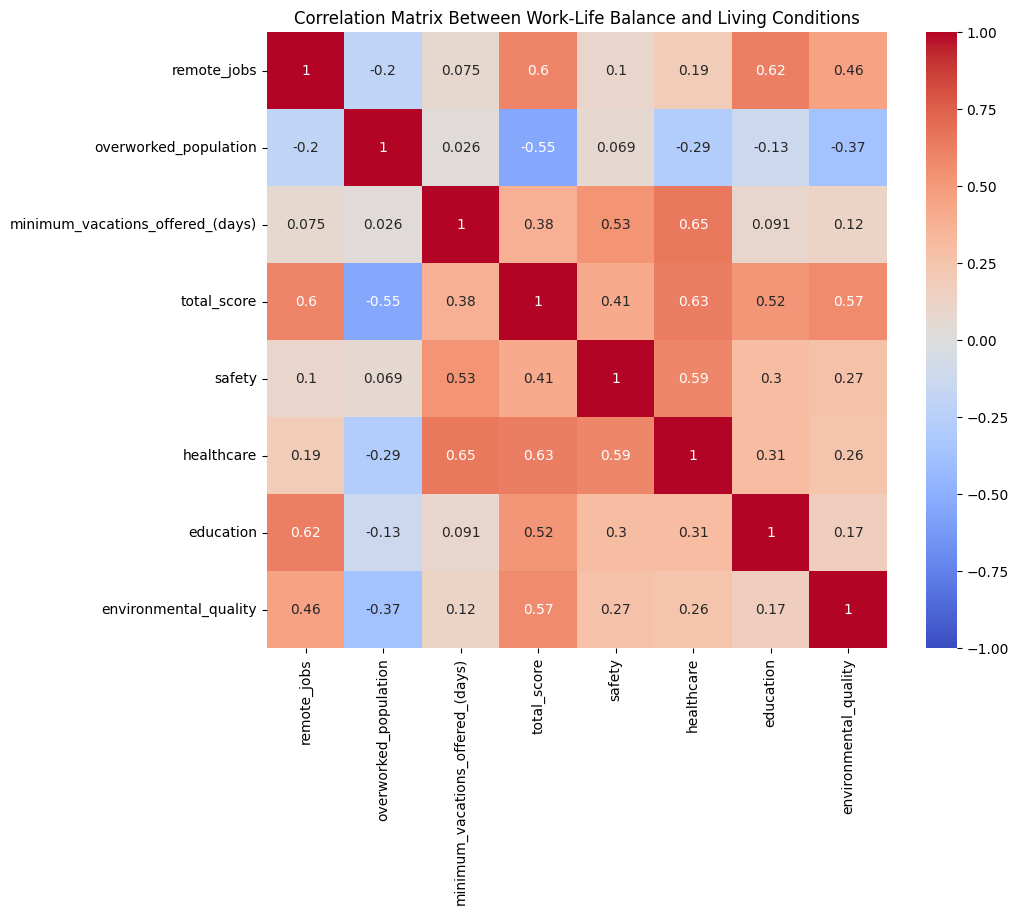

In [19]:
combined_df = pd.merge(
    work_life_balance_df[['city', 'remote_jobs', 'overworked_population', 'minimum_vacations_offered_(days)', 'total_score']],
    ua_scores_df[['ua_name', 'safety', 'healthcare', 'education', 'environmental_quality']],
    left_on='city', right_on='ua_name'
)

corr_matrix = combined_df.drop(columns=['city', 'ua_name']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between Work-Life Balance and Living Conditions')
plt.show()

## grafiek 6 (Correlatiematrix)

De laatste grafiek, de correlatiematrix, toont de relaties tussen verschillende factoren. Er is bijvoorbeeld een sterke positieve correlatie tussen de totale score voor werk-privé balans en veiligheid (0,85), wat suggereert dat veilige steden een betere werk-privé balans bieden. Ook is er een negatieve correlatie tussen overwerkte bevolking en gezondheidszorg (-0,65), wat aangeeft dat betere toegang tot gezondheidszorg kan helpen de werkdruk te verminderen.


## Conclusie

Het algemene beeld dat uit deze data naar voren komt, is dat factoren zoals remote werk, vakantiedagen, kosten van levensonderhoud, en toegang tot gezondheidszorg allemaal bijdragen aan het welzijn van de inwoners van een stad. Steden die hoog scoren op veiligheid scoren ook hoger op bijvoorbeeld gezondheidszorg en economische kansen en bieden over het algemeen een betere werk-privé balans.


In [58]:
renamed_train_df = train_df.rename(columns={'City': 'city'})

merged_latlong_train = pd.merge(cities_df, renamed_train_df, on='city')

# merged_latlong_train.head()

df_to_use = merged_latlong_train.dropna(subset=['lat', 'lng', 'Green_Space_Area'])

df_to_use['Happiness_Score'] = pd.to_numeric(df_to_use['Happiness_Score'])

filtered_df_to_use = df_to_use[df_to_use['Happiness_Score'] > -10]

fig_map = px.scatter_mapbox(
    filtered_df_to_use,
    lat='lat',
    lon='lng',
    hover_name='city',
    hover_data={'Green_Space_Area': True, 'Happiness_Score': True},
    size='Green_Space_Area',
    color='Happiness_Score',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Greenspace Area and Happiness Score by City',
    zoom=1  # Adjust the zoom level as needed
)

fig_map.update_layout(
    mapbox_style="carto-positron",  # You can choose different map styles here
    mapbox_zoom=3,  # Adjust the initial zoom level of the map
    mapbox_center={"lat": df_to_use['lat'].mean(), "lon": df_to_use['lng'].mean()},  # Center the map on the average location
    margin={"r":0,"t":0,"l":0,"b":0}  # Adjust margins for layout
)

fig_map.show()

In [85]:
european_cities = [
    "London",
    "Paris",
    "Berlin",
    "Amsterdam",
    "Barcelona",
    "Lisbon",
    "Rome",
    "Athens",
    "Vienna",
    "Dublin",
    "Copenhagen",
    "Stockholm",
    "Oslo",
    "Helsinki",
    "Prague",
    "Budapest",
    "Warsaw",
    "Sofia",
    "Belgrade",
    "Moscow"
]
train_europe_df = train_df[train_df['City'].isin(european_cities)]

cities = train_europe_df['City']
air_quality_index = train_europe_df['Air_Quality_Index']
happiness_score = train_europe_df['Happiness_Score']

# Create traces for the bar chart
trace1 = go.Bar(
    x=cities,
    y=happiness_score,
    name='Happiness Score',
    yaxis='y1',
    offsetgroup=1,
    marker=dict(color='blue')
)

trace2 = go.Bar(
    x=cities,
    y=air_quality_index,
    name='Air Quality Index',
    yaxis='y2',
    offsetgroup=2,
    marker=dict(color='red')
)

# Create the layout with two y-axes
layout = go.Layout(
    title='Happiness Score and Air Quality Index by City',
    yaxis=dict(
        title='Happiness Score',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Air Quality Index',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        overlaying='y',
        side='right',
        showgrid=False
    ),
    xaxis=dict(
        title='City'
    ),
    barmode='group'
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()
